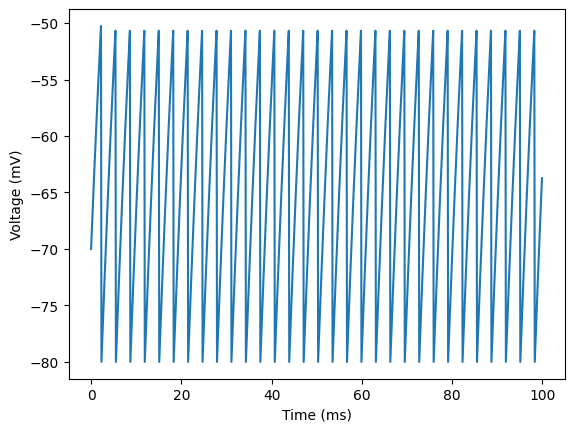

In [3]:
from brian2 import *
import matplotlib.pyplot as plt

# Define the LIF model parameters
tau_m = 10*ms       # Membrane time constant
V_rest = -70*mV     # Resting potential
V_reset = -80*mV    # Reset potential after spike
V_thresh = -50*mV   # Spike threshold
R = 100*Mohm        # Membrane resistance

# LIF equation
eqs = '''
dV/dt = (V_rest - V + R*I) / tau_m : volt
I : amp
'''

# Create a single LIF neuron
G = NeuronGroup(1, eqs, threshold='V > V_thresh', reset='V = V_reset', method='linear')
G.V = V_rest   # Initial potential
G.I = 1*nA     # Apply a constant current

# Record the voltage
mon = StateMonitor(G, 'V', record=True)

# Run the simulation
run(100*ms)

# Plot the results
plt.figure()
plt.plot(mon.t/ms, mon.V[0]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.show()